<a href="https://colab.research.google.com/github/invest41/Salary-of-Dara-Scientists/blob/main/Data_Scientist_Salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
 from bs4 import BeautifulSoup as BS
import requests, re
import pandas as pd, numpy as np
import pickle
import datetime as dt
import matplotlib, matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [49]:
source_urls = [
'https://h1bdata.info/index.php?em=&job=Data+Scientist&city=&year=All+Years'
]
 
# Store Data in a list
job_list = []
for link in source_links:
    page_url = link
    page_response = requests.get(page_url, timeout=1000)
    page_content = BS(page_response.content, 'lxml')
 
    for row in page_content.find_all('tr')[1:]:
        row_data = []
        [ row_data.append(i.text) for i in row ]
        jobs_list.append(row_data)

In [38]:
 # Put everything into dataframes for easier processing
ds_jobs_df = pd.DataFrame()
ds_jobs_df['company'] = [i[0] for i in jobs_list]
ds_jobs_df['title'] = [i[1] for i in jobs_list]
 
ds_jobs_df['salary'] = [i[2].replace(',','') for i in jobs_list]
ds_jobs_df['salary'] = ds_jobs_df['salary'].astype(float)
 
ds_jobs_df['location'] = [i[3] for i in jobs_list]
 
ds_jobs_df['date'] = [i[4] for i in jobs_list]
ds_jobs_df['date'] = pd.to_datetime(ds_jobs_df['date'])
ds_jobs_df['year'] = [i.year for i in ds_jobs_df['date']]
 
# Drop pre 2014 data (very few observations pre 2014)
ds_jobs_df.drop(ds_jobs_df[ds_jobs_df['year']<2014].index, axis=0, inplace=True)
 
# Drop salaries over $1,000,000
ds_jobs_df.drop(ds_jobs_df[ds_jobs_df['salary']>1000000].index, axis=0, inplace=True)
 
# Sort by company and year
ds_jobs_df.sort_values(by=['year','company'], inplace=True, ascending=True)

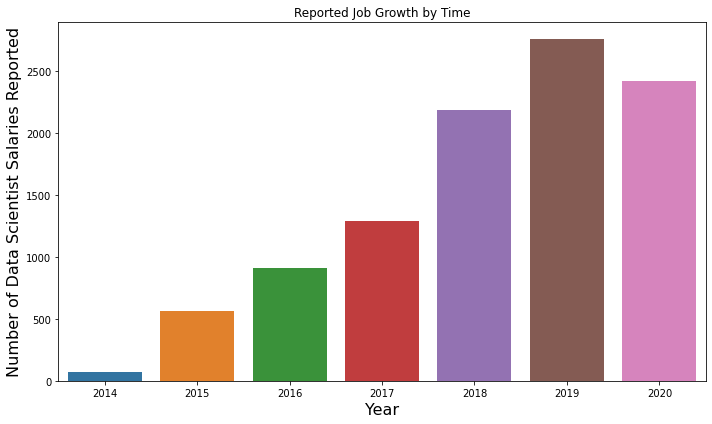

In [53]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=ds_jobs_df['year'].value_counts().sort_index().index, 
                 y=ds_jobs_df['year'].value_counts().sort_index().values)
plt.title('Reported Job Growth by Time')
ax.set_xlabel("Year",fontsize=16)
ax.set_ylabel("Number of Data Scientist Salaries Reported",fontsize=16)
plt.tight_layout()
plt.savefig(fname='num_jobs', dpi=150)

In [67]:
ds_jobs_df[['company','salary']][ds_jobs_df['salary']>200_000].head(6)
 
 
 
sorted_jobs = ds_jobs_df.sort_values(by='salary', ascending=False)
sorted_jobs.head()

,company,title,salary,location,date,year
10197,TAGUP INC,DATA SCIENTIST,870000.0,"SOMERVILLE, MA",2020-03-27,2020
10196,NETFLIX INC,DATA SCIENTIST,360000.0,"LOS GATOS, CA",2019-11-19,2019
229,LARSON LIVING LABS LLC,DATA SCIENTIST,312000.0,"CAMBRIDGE, MA",2018-03-21,2018
230,LARSON LIVING LABS LLC,DATA SCIENTIST,312000.0,"CAMBRIDGE, MA",2018-05-14,2018
10195,CITADEL AMERICAS LLC,DATA SCIENTIST,300000.0,"NEW YORK, NY",2019-10-08,2019


In [69]:
#Median Salary
med = ds_jobs_df['salary'].median()
print (f'Median Salary: ${med}')
 
#Percentile
p_tile = np.percentile((ds_jobs_df['salary'].values),10)
print (f'10th Percentile: ${p_tile}')

Median Salary: $106000.0
10th Percentile: $74443.0


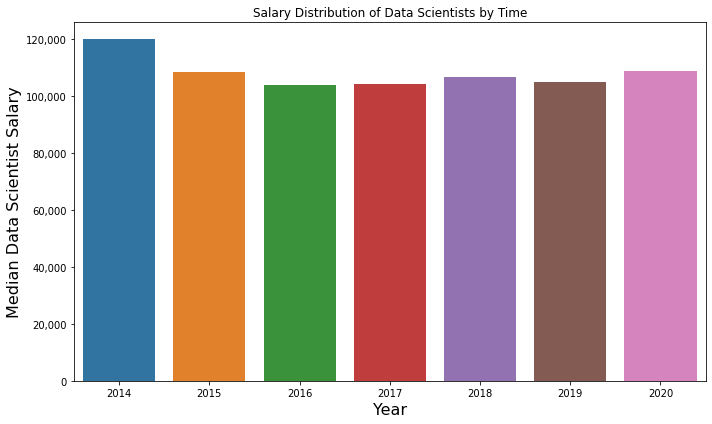

In [41]:
median_salary = ds_jobs_df.groupby(by=['year']).median().reset_index()
 
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=median_salary['year'], 
                 y=median_salary['salary'])
plt.title('Salary Distribution of Data Scientists by Time')
ax.set_xlabel("Year",fontsize=16)
ax.set_ylabel("Median Data Scientist Salary",fontsize=16)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.tight_layout()
plt.savefig(fname='median_salary', dpi=150)

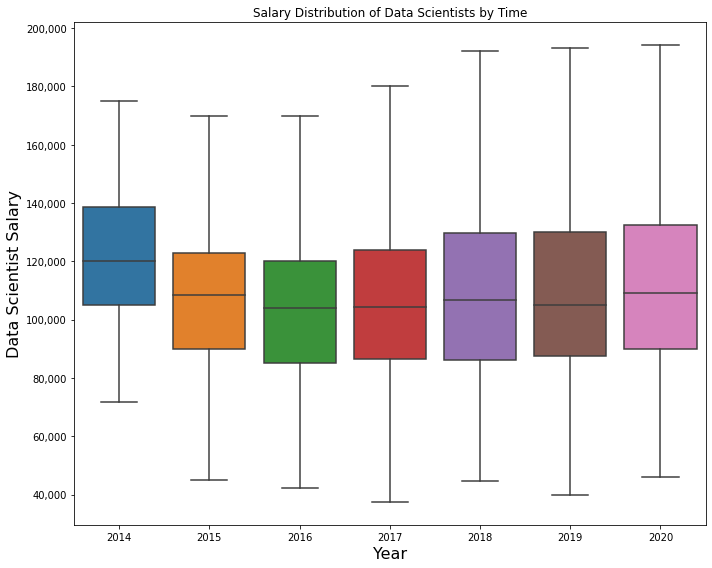

In [57]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x='year', y='salary', data=ds_jobs_df, showfliers=False);
plt.title('Salary Distribution of Data Scientists by Time')
ax.set_xlabel("Year",fontsize=16)
ax.set_ylabel("Data Scientist Salary",fontsize=16)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.tight_layout()
plt.savefig(fname='salary_box', dpi=150)

In [26]:
 print('All 25th perctile: ' + str(ds_jobs_df['salary'].quantile(0.25)))
print('All 50th perctile: ' + str(ds_jobs_df['salary'].quantile(0.50)))
print('All 75th perctile: ' + str(ds_jobs_df['salary'].quantile(0.75)))

All 25th perctile: 108000.0
All 50th perctile: 125000.0
All 75th perctile: 144787.0


In [27]:
 print('2019 25th perctile: ' + str(ds_jobs_df[ds_jobs_df['year']>=2019]['salary'].quantile(0.25)))
print('2019 50th perctile: ' + str(ds_jobs_df[ds_jobs_df['year']>=2019]['salary'].quantile(0.50)))
print('2019 75th perctile: ' + str(ds_jobs_df[ds_jobs_df['year']>=2019]['salary'].quantile(0.75)))

2019 25th perctile: 110359.0
2019 50th perctile: 131997.0
2019 75th perctile: 150000.0


In [28]:
 print('2020 25th perctile: ' + str(ds_jobs_df[ds_jobs_df['year']==2020]['salary'].quantile(0.25)))
print('2020 50th perctile: ' + str(ds_jobs_df[ds_jobs_df['year']==2020]['salary'].quantile(0.50)))
print('2020 75th perctile: ' + str(ds_jobs_df[ds_jobs_df['year']==2020]['salary'].quantile(0.75)))

2020 25th perctile: 111000.0
2020 50th perctile: 135000.0
2020 75th perctile: 150000.0


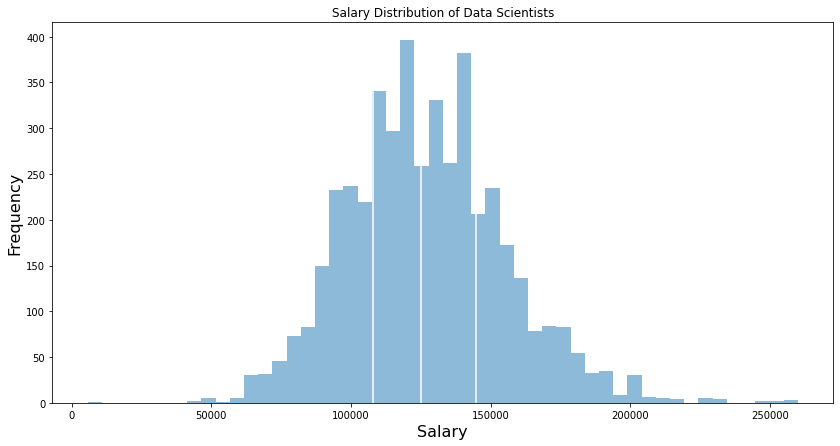

In [29]:
 # Histogram of salaries
#1.0
fig, ax = plt.subplots(figsize=(14,7))
ax = plt.hist(ds_jobs_df['salary'], bins=50, alpha=0.5)
plt.axvline(ds_jobs_df['salary'].quantile(0.25), c='white')
plt.axvline(ds_jobs_df['salary'].quantile(0.50), c='white')
plt.axvline(ds_jobs_df['salary'].quantile(0.75), c='white')
 
#2.0
plt.title('Salary Distribution of Data Scientists')
plt.xlabel('Salary',fontsize=16)
plt.ylabel('Frequency',fontsize=16)
 
#3.0
plt.savefig(fname='salary_hist', dpi=150)
plt.show()

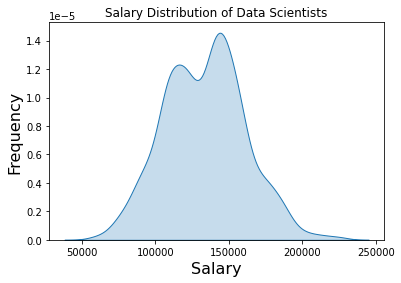

<Figure size 3600x2592 with 0 Axes>

In [36]:
sns.kdeplot(x = ds_jobs_df['salary'][ds_jobs_df['year']==2020], shade=True)
plt.xlabel('Salary',fontsize=16)
plt.ylabel('Frequency',fontsize=16)
plt.title('Salary Distribution of Data Scientists')
plt.figure(figsize=(50,36))
plt.savefig(fname='salary_kde', dpi=150)

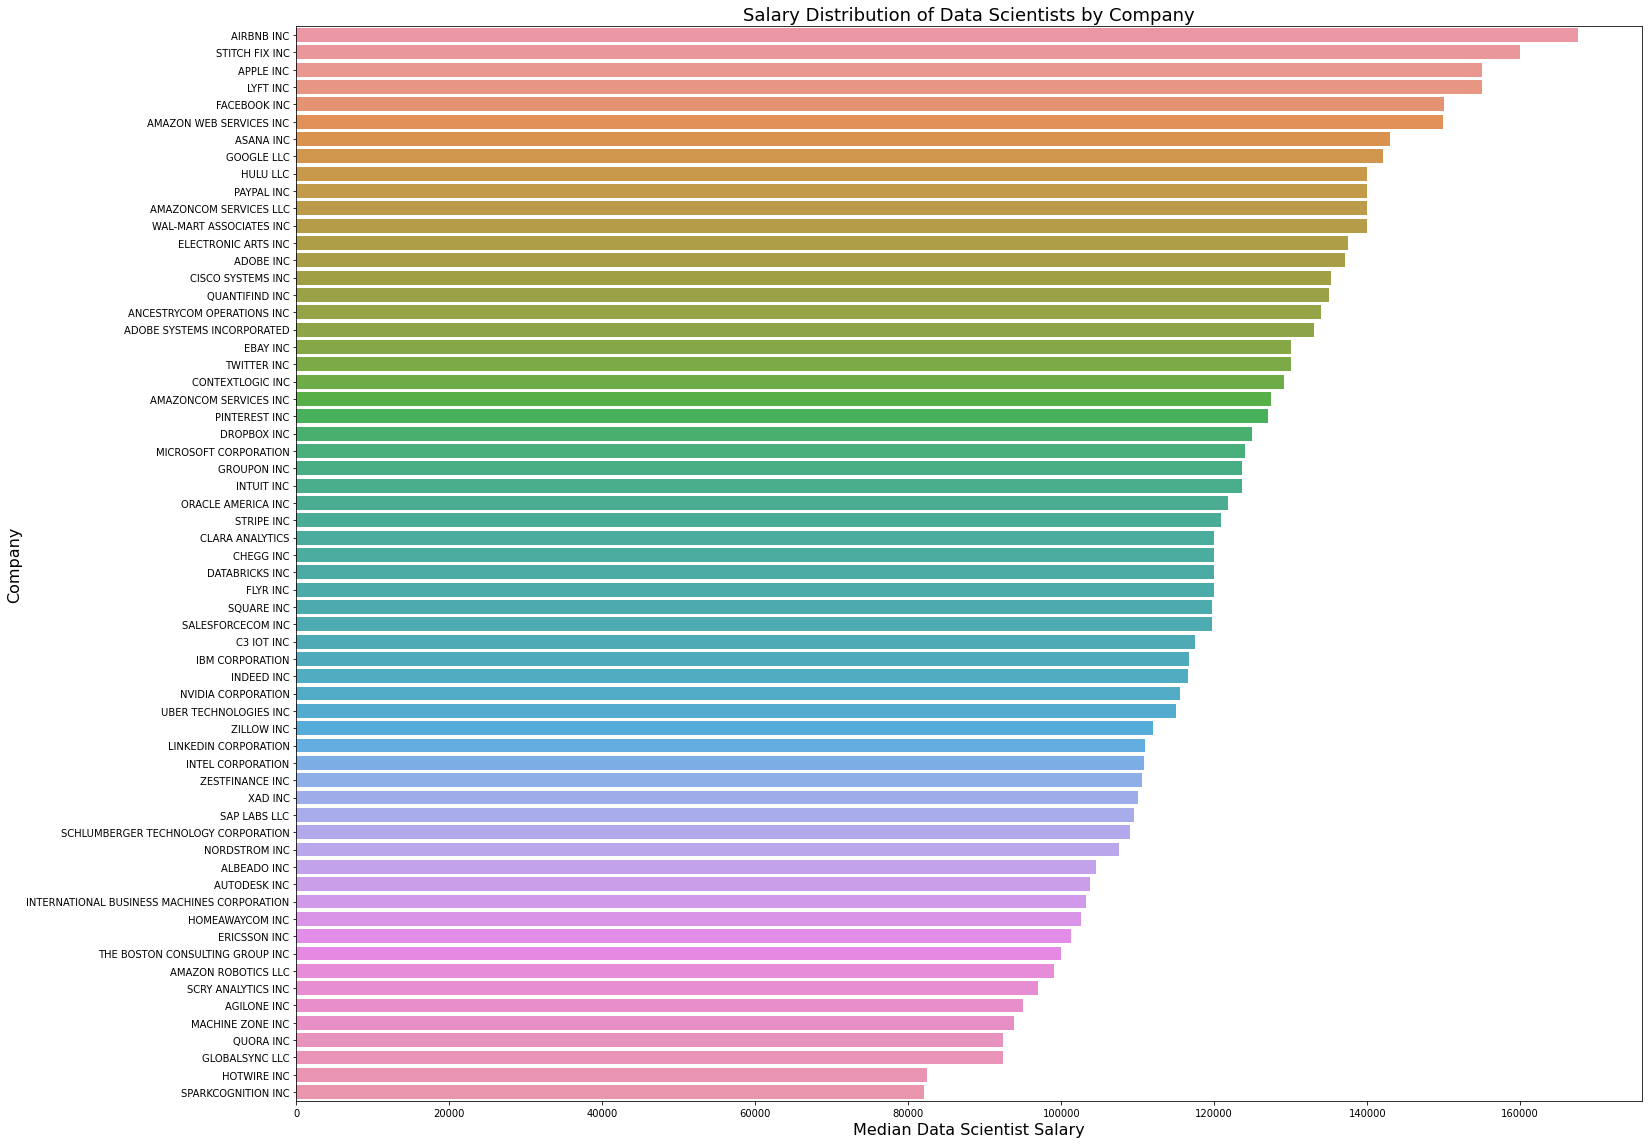

In [31]:
#1.0
company_df = pd.DataFrame()
company_df['company'] = ds_jobs_df[['company','salary']].groupby(by=['company']).count().reset_index()['company']
company_df['count'] = ds_jobs_df[['company','salary']].groupby(by=['company']).count().reset_index()['salary']
company_df['salary'] = ds_jobs_df[['company','salary']].groupby(by=['company']).median().reset_index()['salary']
sorted_df = company_df.sort_values(by='salary', ascending=False)
sorted_df= sorted_df[sorted_df['count']>=10]
 
#2.0
fig, ax = plt.subplots(figsize=(23,16))
ax = sns.barplot(x=sorted_df['salary'], 
                 y=sorted_df['company'])
 
#3.0
plt.title('Salary Distribution of Data Scientists by Company',fontsize=18)
ax.set_xlabel("Median Data Scientist Salary",fontsize=16)
ax.set_ylabel("Company",fontsize=16)
plt.tight_layout()
plt.savefig(fname='company_median_salary', dpi=150)

In [ ]:
sorted_df.iloc[0:5]

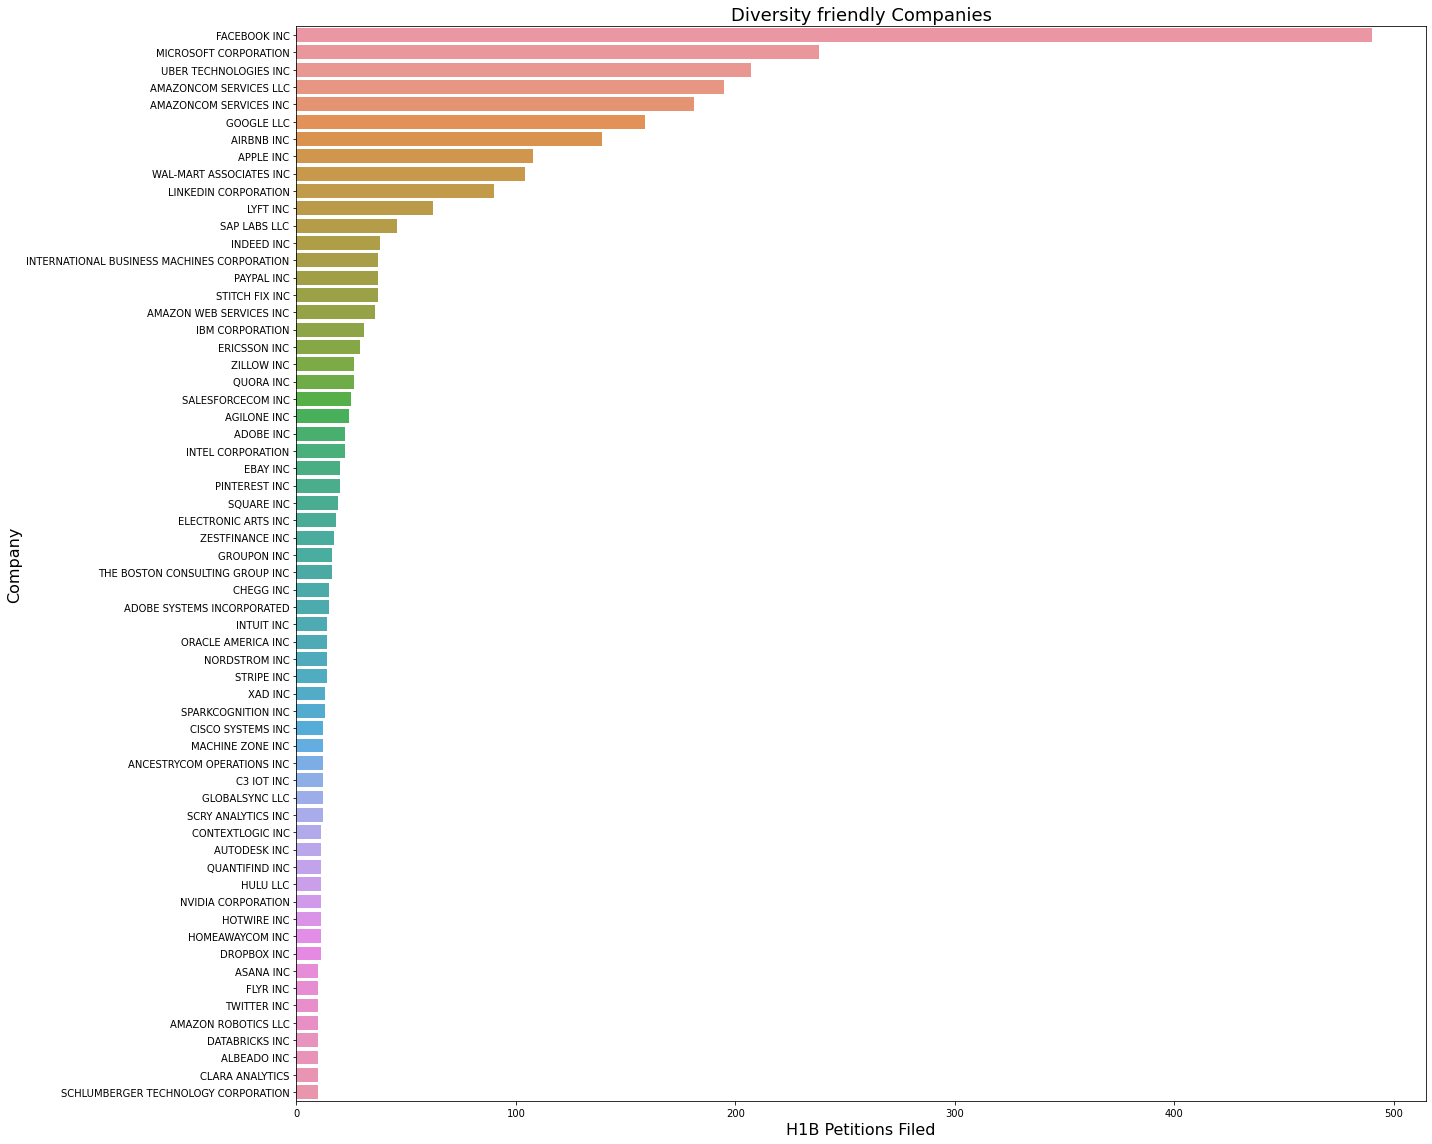

In [33]:
 
#1.0
sorted_df = company_df.sort_values(by='count', ascending=False)
sorted_df= sorted_df[sorted_df['count']>=10]
 
#2.0
fig, ax = plt.subplots(figsize=(20,16))
ax = sns.barplot(x=sorted_df['count'], 
                 y=sorted_df['company'])
 
#3.0
plt.title('Diversity friendly Companies',fontsize=18)
ax.set_xlabel("H1B Petitions Filed",fontsize=16)
ax.set_ylabel("Company",fontsize=16)
plt.tight_layout()
plt.savefig(fname='company_hired', dpi=150)